In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mierda.xlsx to mierda.xlsx


In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

mierda.xlsx


In [ ]:
df=pd.read_excel(fname, index_col='date',parse_dates=True)

In [ ]:
df.head(5)

,zone,time,total crimes per zone,type of crime,description of the crime,latitude,longitude
date,,,,,,,
2023-01-03,Zone 1,14:17:08,3,homicide,firearm,14.630869,-90.519781
2023-02-15,Zone 1,01:32:10,1,homicide,white weapon,14.630869,-90.519781
2023-01-14,Zone 1,04:59:42,1,homicide,blunt weapon,14.630869,-90.519781
2023-02-01,Zone 1,05:05:31,0,homicide,explosive device,14.630869,-90.519781
2023-02-24,Zone 1,23:20:36,0,homicide,strangled,14.630869,-90.519781


<Axes: xlabel='date'>

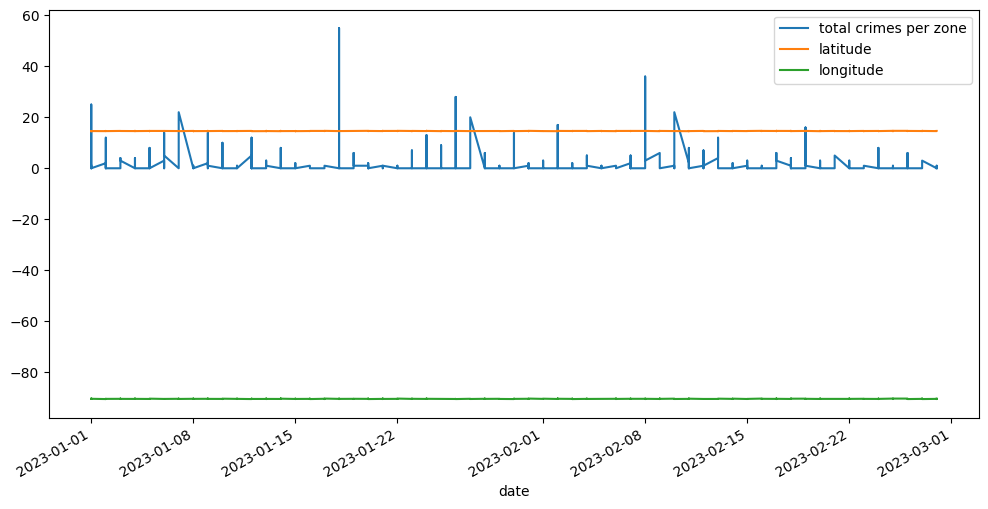

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
len(df)

572

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(              zone      time  total crimes per zone type of crime  \
 date                                                                
 2023-01-03  Zone 1  14:17:08                      3      homicide   
 2023-02-15  Zone 1  01:32:10                      1      homicide   
 2023-01-14  Zone 1  04:59:42                      1      homicide   
 2023-02-01  Zone 1  05:05:31                      0      homicide   
 2023-02-24  Zone 1  23:20:36                      0      homicide   
 
            description of the crime   latitude  longitude  
 date                                                       
 2023-01-03                  firearm  14.630869 -90.519781  
 2023-02-15             white weapon  14.630869 -90.519781  
 2023-01-14             blunt weapon  14.630869 -90.519781  
 2023-02-01         explosive device  14.630869 -90.519781  
 2023-02-24                strangled  14.630869 -90.519781  ,
                zone      time  total crimes per zone     type of crime  \
 date

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

ValueError: ignored

In [ ]:
scaled_train[:10]

array([[0.11464968],
       [0.02547771],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.08280255],
       [0.00636943],
       [0.14649682],
       [0.01910828],
       [0.02547771]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11464968 0.02547771 0.        ]
Predict this y: 
 [[0.]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 6s 14ms/step - loss: 0.0202
Epoch 2/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0189
Epoch 3/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0197
Epoch 4/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 5/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 7/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 8/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0193
Epoch 9/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 10/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0193
Epoch 11/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0192
Epoch 12/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0191
Epoch 13/50
144/144 [=

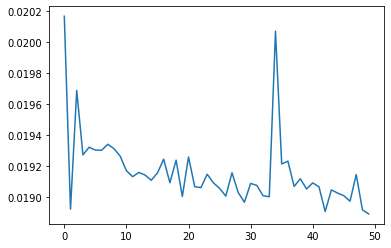

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 244ms/step


array([[0.05159882]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
test_predictions

[array([0.05159882], dtype=float32),
 array([0.05241975], dtype=float32),
 array([0.05497891], dtype=float32),
 array([0.05881671], dtype=float32),
 array([0.06341884], dtype=float32),
 array([0.07644077], dtype=float32),
 array([0.07737704], dtype=float32),
 array([0.07785457], dtype=float32),
 array([0.07826497], dtype=float32),
 array([0.07792641], dtype=float32),
 array([0.07765532], dtype=float32),
 array([0.07746162], dtype=float32),
 array([0.07734276], dtype=float32),
 array([0.07728849], dtype=float32),
 array([0.07727002], dtype=float32),
 array([0.07727262], dtype=float32),
 array([0.07728218], dtype=float32),
 array([0.07729164], dtype=float32),
 array([0.07729939], dtype=float32),
 array([0.07730337], dtype=float32),
 array([0.07730492], dtype=float32),
 array([0.07730515], dtype=float32),
 array([0.0773048], dtype=float32),
 array([0.07730433], dtype=float32),
 array([0.07730393], dtype=float32),
 array([0.07730369], dtype=float32),
 array([0.07730358], dtype=float32),
 a

In [ ]:
test.head()

,TOTAL,Predictions
DATE,,
2017-04-18,0,8.101014
2017-04-19,17,8.229900
2017-04-19,0,8.631690
2017-04-20,0,9.234223
2017-04-20,0,9.956757


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-45-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

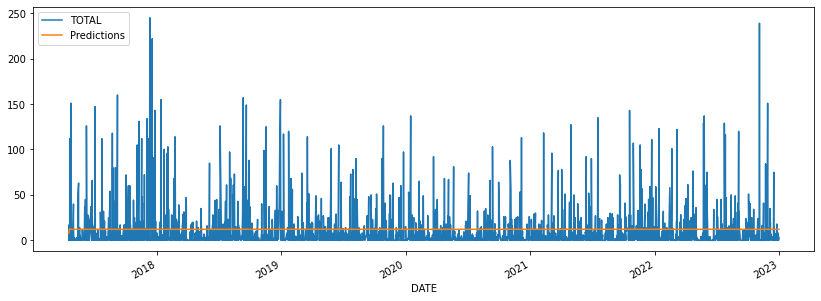

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['TOTAL'],test['Predictions']))
print(rmse)

21.14614213438132
